Run 1/5
Problem Info: {'PROBLEM NAME': 'a280-TTP', 'KNAPSACK DATA TYPE': 'uncorrelated, similar weights', 'DIMENSION': 280, 'NUMBER OF ITEMS': 1395, 'CAPACITY OF KNAPSACK': 637010, 'MIN SPEED': 0.1, 'MAX SPEED': 1, 'RENTING RATIO': 72.7, 'EDGE_WEIGHT_TYPE': 'CEIL_2D'}


/var/folders/40/yskfqhxs5dn7xnsslpk_6pnc0000gn/T/ipykernel_96915/2015169411.py:103: RuntimeWarning: divide by zero encountered in scalar divide
  matrix[i][j][0] = 1 / distance_matrix[i][j]
/var/folders/40/yskfqhxs5dn7xnsslpk_6pnc0000gn/T/ipykernel_96915/2015169411.py:118: RuntimeWarning: invalid value encountered in divide
  probability_matrix = pheromoneHeuristic_matrix / np.nansum(pheromoneHeuristic_matrix, axis=0)


Run 2/5
Problem Info: {'PROBLEM NAME': 'a280-TTP', 'KNAPSACK DATA TYPE': 'uncorrelated, similar weights', 'DIMENSION': 280, 'NUMBER OF ITEMS': 1395, 'CAPACITY OF KNAPSACK': 637010, 'MIN SPEED': 0.1, 'MAX SPEED': 1, 'RENTING RATIO': 72.7, 'EDGE_WEIGHT_TYPE': 'CEIL_2D'}


/var/folders/40/yskfqhxs5dn7xnsslpk_6pnc0000gn/T/ipykernel_96915/2015169411.py:103: RuntimeWarning: divide by zero encountered in scalar divide
  matrix[i][j][0] = 1 / distance_matrix[i][j]
/var/folders/40/yskfqhxs5dn7xnsslpk_6pnc0000gn/T/ipykernel_96915/2015169411.py:118: RuntimeWarning: invalid value encountered in divide
  probability_matrix = pheromoneHeuristic_matrix / np.nansum(pheromoneHeuristic_matrix, axis=0)


Run 3/5
Problem Info: {'PROBLEM NAME': 'a280-TTP', 'KNAPSACK DATA TYPE': 'uncorrelated, similar weights', 'DIMENSION': 280, 'NUMBER OF ITEMS': 1395, 'CAPACITY OF KNAPSACK': 637010, 'MIN SPEED': 0.1, 'MAX SPEED': 1, 'RENTING RATIO': 72.7, 'EDGE_WEIGHT_TYPE': 'CEIL_2D'}


/var/folders/40/yskfqhxs5dn7xnsslpk_6pnc0000gn/T/ipykernel_96915/2015169411.py:103: RuntimeWarning: divide by zero encountered in scalar divide
  matrix[i][j][0] = 1 / distance_matrix[i][j]
/var/folders/40/yskfqhxs5dn7xnsslpk_6pnc0000gn/T/ipykernel_96915/2015169411.py:118: RuntimeWarning: invalid value encountered in divide
  probability_matrix = pheromoneHeuristic_matrix / np.nansum(pheromoneHeuristic_matrix, axis=0)


Run 4/5
Problem Info: {'PROBLEM NAME': 'a280-TTP', 'KNAPSACK DATA TYPE': 'uncorrelated, similar weights', 'DIMENSION': 280, 'NUMBER OF ITEMS': 1395, 'CAPACITY OF KNAPSACK': 637010, 'MIN SPEED': 0.1, 'MAX SPEED': 1, 'RENTING RATIO': 72.7, 'EDGE_WEIGHT_TYPE': 'CEIL_2D'}


/var/folders/40/yskfqhxs5dn7xnsslpk_6pnc0000gn/T/ipykernel_96915/2015169411.py:103: RuntimeWarning: divide by zero encountered in scalar divide
  matrix[i][j][0] = 1 / distance_matrix[i][j]
/var/folders/40/yskfqhxs5dn7xnsslpk_6pnc0000gn/T/ipykernel_96915/2015169411.py:118: RuntimeWarning: invalid value encountered in divide
  probability_matrix = pheromoneHeuristic_matrix / np.nansum(pheromoneHeuristic_matrix, axis=0)


Run 5/5
Problem Info: {'PROBLEM NAME': 'a280-TTP', 'KNAPSACK DATA TYPE': 'uncorrelated, similar weights', 'DIMENSION': 280, 'NUMBER OF ITEMS': 1395, 'CAPACITY OF KNAPSACK': 637010, 'MIN SPEED': 0.1, 'MAX SPEED': 1, 'RENTING RATIO': 72.7, 'EDGE_WEIGHT_TYPE': 'CEIL_2D'}


/var/folders/40/yskfqhxs5dn7xnsslpk_6pnc0000gn/T/ipykernel_96915/2015169411.py:103: RuntimeWarning: divide by zero encountered in scalar divide
  matrix[i][j][0] = 1 / distance_matrix[i][j]
/var/folders/40/yskfqhxs5dn7xnsslpk_6pnc0000gn/T/ipykernel_96915/2015169411.py:118: RuntimeWarning: invalid value encountered in divide
  probability_matrix = pheromoneHeuristic_matrix / np.nansum(pheromoneHeuristic_matrix, axis=0)



Average Solution Value: 69348.2
Standard Deviation of Solution Value: 3602.5198070239667
Average Solution Cost: 13511.737919999996
Standard Deviation of Solution Cost: 441.7145300742374


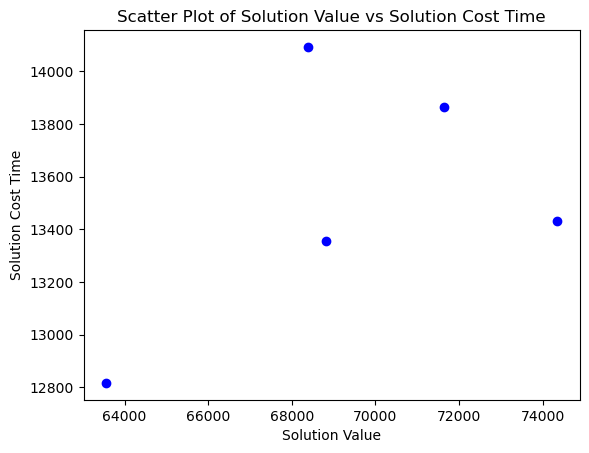

In [1]:
import pandas as pd
import math
import random
import copy
import numpy as np
import matplotlib.pyplot as plt

class TTPSolution:
    def __init__(self, value, cost_time, weight, city_list, pack_list, total_profit, travel_time_cost):
        self.solution_value = value
        self.solution_cost_time = cost_time
        self.solution_weight = weight
        self.solution_path = city_list
        self.solution_pack = pack_list
        self.total_profit = total_profit
        self.travel_time_cost = travel_time_cost

def read_file(data_set_number):
    dataset_files = [
        'a280-n1395.txt', 'a280-n279.txt', 'a280-n2790.txt',
        'fnl4461-n22300.txt', 'fnl4461-n4460.txt', 'fnl4461-n44600.txt',
        'pla33810-n169045.txt', 'pla33810-n33809.txt', 'pla33810-n338090.txt'
    ]
    file_path = dataset_files[data_set_number]

    with open(file_path, 'r') as file:
        file_content = file.readlines()

    # Extract problem information, node coordinates, and item details
    problem_info, node_coord_section, items_section = extract_problem_info(file_content)

    print("Problem Info:", problem_info)  # Add this line to print problem_info

    return problem_info, node_coord_section, items_section

def extract_problem_info(file_content):
    problem_info = {}
    node_coord_section = []
    items_section = []
    reading_node_coords = False
    reading_items = False

    for line in file_content:
        if line.startswith('NODE_COORD_SECTION'):
            reading_node_coords = True
            reading_items = False
            continue
        elif line.startswith('ITEMS SECTION'):
            reading_node_coords = False
            reading_items = True
            continue

        if reading_node_coords and line.strip():
            index, x, y = map(int, line.split())
            node_coord_section.append((index, x, y))

        elif reading_items and line.strip():
            index, x, y, z = map(int, line.split())
            items_section.append((index, x, y, z))

        else:
            # Parse other problem information
            parts = line.split(':')
            key = parts[0].strip()
            value = parts[1].strip()

            if value.isdigit():
                problem_info[key] = int(value)
            else:
                try:
                    problem_info[key] = float(value)
                except ValueError:
                    problem_info[key] = value

    return problem_info, node_coord_section, items_section

def build_distance_matrix(city_number, node_coord_section):
    matrix = np.zeros((city_number, city_number))
    for i in range(city_number):
        for j in range(city_number):
            if i != j:
                x1, y1 = node_coord_section[i][1], node_coord_section[i][2]
                x2, y2 = node_coord_section[j][1], node_coord_section[j][2]
                distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                matrix[i][j] = round(distance, 5)
    return matrix

def initialize_pheromone(city_number):
    return np.ones((city_number, city_number, 4))

def build_city_items(city_number, items_section):
    temp_city_item = [[] for _ in range(city_number)]
    for item in items_section:
        index, x, y, city = item
        temp_city_item[city - 1].append(item)
    return temp_city_item

def build_heuristic_matrix(city_number, city_items, distance_matrix):
    matrix = np.zeros((city_number, city_number, 4))
    for i in range(city_number):
        for j in range(city_number):
            if i != j:
                matrix[i][j][0] = 1 / distance_matrix[i][j]
                if city_items[j]:
                    for item in city_items[j]:
                        if distance_matrix[i][j] != 0 and item[2] != 0:
                            matrix[i][j][1] += 1 / distance_matrix[i][j]
                            matrix[i][j][2] += round(item[1] / item[2], 5)
    return matrix

def transition_probabilities(travel_city_list, city_number, current_pheromone_matrix, current_heuristic_matrix, current_weight):
    current_city = travel_city_list[-1]
    pheromoneHeuristic_matrix = current_pheromone_matrix[current_city] * current_heuristic_matrix[current_city]

    # Avoid divide by zero errors
    pheromoneHeuristic_matrix[pheromoneHeuristic_matrix == 0] = np.nan

    probability_matrix = pheromoneHeuristic_matrix / np.nansum(pheromoneHeuristic_matrix, axis=0)
    probability_matrix = np.nan_to_num(probability_matrix)

    cum_prob = np.cumsum(probability_matrix, axis=0)

    rand = random.random()
    for i in range(city_number):
        if rand <= cum_prob[i, 0]:
            return i, 0
        elif rand <= cum_prob[i, 1]:
            return i, 1
        elif rand <= cum_prob[i, 2]:
            return i, 2
        elif rand <= cum_prob[i, 3]:
            return i, 3

    for i in range(city_number):
        if i in travel_city_list:
            pheromoneHeuristic_matrix[i] = np.zeros(4)
        else:
            pheromoneHeuristic_matrix[i] = np.array([current_pheromone_matrix[current_city][i][k] * current_heuristic_matrix[current_city][i][k] for k in range(4)])

    sum_ = np.sum(pheromoneHeuristic_matrix)

    sum_pro = 0
    for k in range(city_number):
        if k in travel_city_list:
            probability_matrix[k] = np.zeros(4)
        else:
            sum_pro += pheromoneHeuristic_matrix[k] / sum_
            probability_matrix[k] = sum_pro

    rand = random.random()

    for i in range(city_number):
        if probability_matrix[i].any() >= rand:
            return i, int(probability_matrix[i].argmax())

def update_pheromone(evaporation_rate, current_pheromone_matrix, city_number, ant_number, the_evolve_solution, distance_matrix):
    for i in range(city_number):
        for j in range(city_number):
            current_pheromone_matrix[i][j] *= (1 - evaporation_rate)

    sum_distance = np.array([np.sum(distance_matrix[ant.solution_path[:-1], ant.solution_path[1:]]) for ant in the_evolve_solution])

    for i, ant in enumerate(the_evolve_solution):
        for j in range(len(ant.solution_path)):
            if j == len(ant.solution_path) - 1:
                current_pheromone_matrix[ant.solution_path[j]][ant.solution_path[0]] += 1 / sum_distance[i]
            else:
                current_pheromone_matrix[ant.solution_path[j]][ant.solution_path[j + 1]] += 1 / sum_distance[i]

def current_speed(v_max, v_min, capacity_of_knapsack, current_weight):
    if current_weight <= capacity_of_knapsack:
        return v_max - ((current_weight / capacity_of_knapsack) * (v_max - v_min))
    else:
        return v_min

def update_best_solution(best_solution, ant_solution):
    if not best_solution:
        best_solution.append(ant_solution)
    else:
        for i, best in enumerate(best_solution):
            if ant_solution.solution_value >= best.solution_value and ant_solution.solution_cost_time <= best.solution_cost_time:
                best_solution.pop(i)
                best_solution.append(ant_solution)
                break
        else:
            best_solution.append(ant_solution)
    return best_solution

def update_heuristic_matrix(current_heuristic_matrix, city_items, capacity_of_knapsack, current_weight):
    for i, items in enumerate(city_items):
        if items:
            for j, item in enumerate(items):
                if (current_weight + item[2]) > capacity_of_knapsack:
                    current_heuristic_matrix[i][j + 1] = 0

def calculate_total_profit(path, items, item_data, distances, v_max, v_min, W, R):
    total_profit = 0
    total_weight = 0
    v = (v_max - v_min) / W

    selected_items = np.zeros(len(item_data), dtype=int)

    for item_index in items:
        selected_items[item_index - 1] = 1

    for index, row in item_data.iterrows():
        if selected_items[index]:
            total_profit += row['PROFIT']
            total_weight += row['WEIGHT']

    travel_time_cost = np.sum(distances[path[:-1], path[1:]] / (v_max - v * total_weight))
    travel_time_cost += distances[path[-1]][path[0]] / (v_max - v * total_weight)

    total_profit -= R * travel_time_cost

    return total_profit, travel_time_cost

def run_aco_algorithm(data_set_number, num_runs):
    best_solutions = []

    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs}")
        problem_info, node_coord_section, items_section = read_file(data_set_number)

        city_number = problem_info['DIMENSION']
        capacity_of_knapsack = problem_info['CAPACITY OF KNAPSACK']  # Correct key name
        min_speed = problem_info['MIN SPEED']
        max_speed = problem_info['MAX SPEED']
        renting_ratio = problem_info['RENTING RATIO']
        
        distance_matrix = build_distance_matrix(city_number, node_coord_section)
        current_pheromone_matrix = initialize_pheromone(city_number)
        city_items = build_city_items(city_number, items_section)

        item_data = pd.DataFrame(items_section, columns=['INDEX', 'PROFIT', 'WEIGHT', 'ASSIGNMENT'])

        ant_number = 10
        solution = []

        for _ in range(1):  # You can adjust the number of iterations
            the_evolve_solution = []

            for ant in range(ant_number):
                travel_city_list = []
                travel_package = []
                current_speed_val = 0
                current_weight = 0
                current_value = 0
                cost_time = 0

                first_city = random.randint(0, city_number - 1)
                travel_city_list.append(first_city)

                current_heuristic_matrix = build_heuristic_matrix(city_number, city_items, distance_matrix)
                current_speed_val = current_speed(max_speed, min_speed, capacity_of_knapsack, current_weight)

                for _ in range(city_number - 1):
                    next_city, next_item = transition_probabilities(
                        travel_city_list, city_number, current_pheromone_matrix,
                        current_heuristic_matrix, current_weight
                    )

                    if next_item != 0:
                        next_item_weight = city_items[next_city][next_item][2]
                        next_item_number = city_items[next_city][next_item][0]
                        travel_package.append(next_item_number)
                        current_weight += next_item_weight
                        cost_time += distance_matrix[travel_city_list[-1]][next_city] / current_speed_val
                        current_value += city_items[next_city][next_item][1]

                    travel_city_list.append(next_city)

                total_profit, travel_time_cost = calculate_total_profit(
                    travel_city_list, travel_package,
                    item_data, distance_matrix, max_speed, min_speed, capacity_of_knapsack, renting_ratio
                )

                ant_solution = TTPSolution(
                    current_value, cost_time, current_weight,
                    travel_city_list, travel_package, total_profit, travel_time_cost
                )
                solution.append(ant_solution)
                the_evolve_solution.append(ant_solution)

            evaporation_rate = 0.5
            update_pheromone(evaporation_rate, current_pheromone_matrix, city_number, ant_number, the_evolve_solution,
                             distance_matrix)

        best_solution = max(solution, key=lambda x: x.solution_value / x.solution_cost_time)
        best_solutions.append(best_solution)

    # Statistical Analysis
    all_solution_values = np.array([solution.solution_value for solution in best_solutions])
    all_solution_costs = np.array([solution.solution_cost_time for solution in best_solutions])

    avg_solution_value = np.mean(all_solution_values)
    std_solution_value = np.std(all_solution_values)
    avg_solution_cost = np.mean(all_solution_costs)
    std_solution_cost = np.std(all_solution_costs)

    print(f"\nAverage Solution Value: {avg_solution_value}")
    print(f"Standard Deviation of Solution Value: {std_solution_value}")
    print(f"Average Solution Cost: {avg_solution_cost}")
    print(f"Standard Deviation of Solution Cost: {std_solution_cost}")

    plt.scatter(all_solution_values, all_solution_costs, color='blue', marker='o')
    plt.title('Scatter Plot of Solution Value vs Solution Cost Time')
    plt.xlabel('Solution Value')
    plt.ylabel('Solution Cost Time')
    plt.show()

# Run the ACO algorithm with a specific dataset and number of runs
run_aco_algorithm(0, 5)
